In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Menyiapkan Dataset

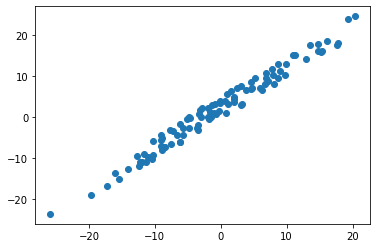

In [2]:
torch.manual_seed(93)
X = torch.randn(100,1) * 10
y = X + torch.rand(100,1) * 5
plt.scatter(X.numpy(), y.numpy())

In [3]:
list(zip(X.numpy()[:5],y.numpy()[:5]))

[(array([2.4188056], dtype=float32), array([7.0679407], dtype=float32)),
 (array([-5.7098937], dtype=float32), array([-2.6777048], dtype=float32)),
 (array([5.9021335], dtype=float32), array([7.125509], dtype=float32)),
 (array([-6.211145], dtype=float32), array([-6.011127], dtype=float32)),
 (array([7.8337145], dtype=float32), array([11.727678], dtype=float32))]

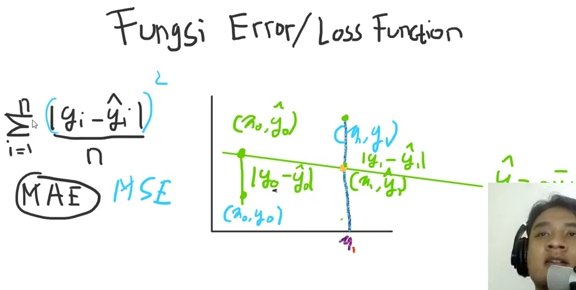
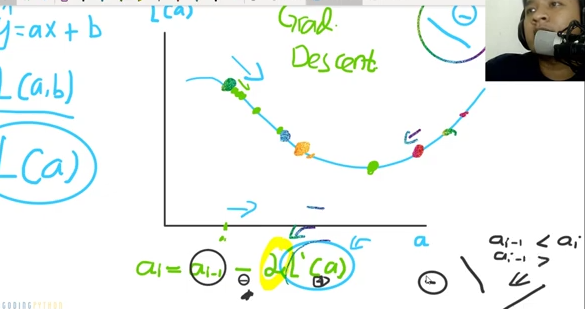
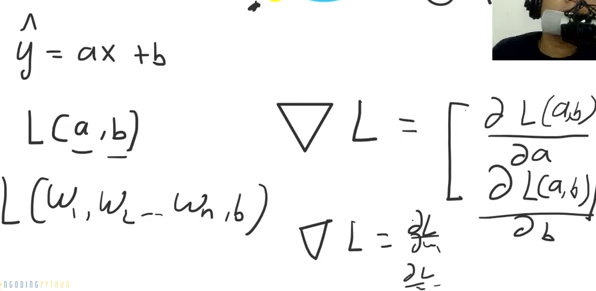
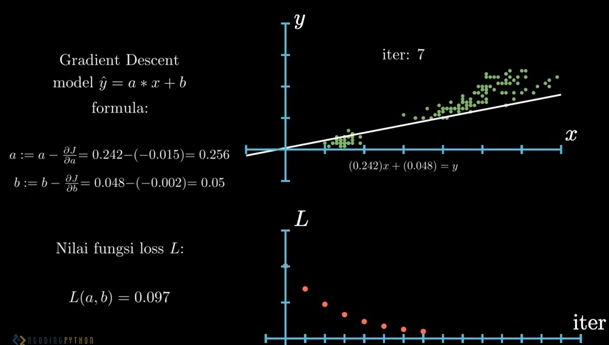

In [4]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [5]:
model = LR(1,1)

In [6]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.4754]], requires_grad=True), Parameter containing:
tensor([0.6263], requires_grad=True)]


In [7]:
x = torch.tensor([1.0])
print(model.forward(x))

tensor([0.1508], grad_fn=<AddBackward0>)


In [8]:
[a, b] = model.parameters()

In [9]:
def get_params():
    return a[0][0].item(), b[0].item()
a[0][0].item()

-0.4754371643066406

In [11]:
def plot_model(judul):
    plt.title = judul
    a, b = get_params()
    x1 = np.array([-30, 30])
    y1 = a*x1 + b
    plt.plot(x1,y1,'r')
    plt.scatter(X,y)

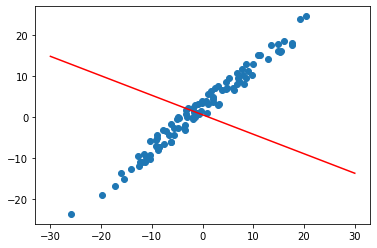

In [12]:
plot_model("Model Inisial")

# Training Model

In [14]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [15]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("Epoch ke-{}, Loss : {}".format(i, loss))
    losses.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch ke-0, Loss : 198.1757049560547
Epoch ke-1, Loss : 116.61917114257812
Epoch ke-2, Loss : 69.51908874511719
Epoch ke-3, Loss : 42.29872512817383
Epoch ke-4, Loss : 26.548669815063477
Epoch ke-5, Loss : 17.417646408081055
Epoch ke-6, Loss : 12.106860160827637
Epoch ke-7, Loss : 9.001635551452637
Epoch ke-8, Loss : 7.170411586761475
Epoch ke-9, Loss : 6.075727462768555
Epoch ke-10, Loss : 5.407459259033203
Epoch ke-11, Loss : 4.986634731292725
Epoch ke-12, Loss : 4.709954738616943
Epoch ke-13, Loss : 4.517768383026123
Epoch ke-14, Loss : 4.375611782073975
Epoch ke-15, Loss : 4.263551235198975
Epoch ke-16, Loss : 4.170039653778076
Epoch ke-17, Loss : 4.088367462158203
Epoch ke-18, Loss : 4.014620780944824
Epoch ke-19, Loss : 3.9464962482452393
Epoch ke-20, Loss : 3.8826260566711426
Epoch ke-21, Loss : 3.8221793174743652
Epoch ke-22, Loss : 3.764639377593994
Epoch ke-23, Loss : 3.7096707820892334
Epoch ke-24, Loss : 3.6570446491241455
Epoch ke-25, Loss : 3.6065969467163086
Epoch ke-26,

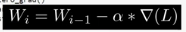

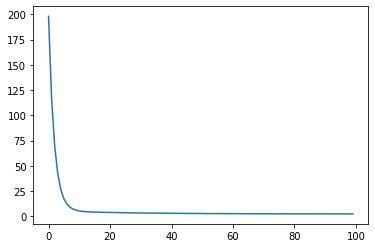

In [18]:
plt.plot(range(epochs), losses);

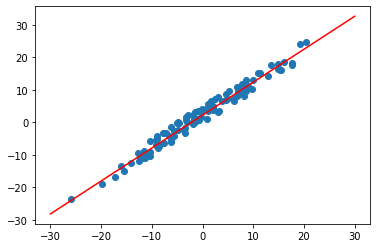

In [19]:
plot_model("Trained Model")

## ZERO GRAD

In [20]:
def f(x):
    return x**2

In [21]:
x = torch.tensor(1.0, requires_grad=True)

In [22]:
y = f(x)

In [23]:
y.backward()

In [24]:
x.grad

tensor(2.)

In [27]:
y = f(x)
y.backward()

In [28]:
x.grad

tensor(6.)